# 1. Understanding The Data

In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (mean_squared_error, confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, roc_curve, roc_auc_score)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Datasets and Inspection
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

# https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [ ]:
# Google collab import file
from google.colab import files
uploaded = files.upload()


Saving mixed_playlist.csv to mixed_playlist.csv


In [8]:
# Google collab import
#df = pd.read_csv('/content/mixed_playlist.csv')

# Regular import
df = pd.read_csv('mixed_playlist.csv')

In [9]:
# Save
original_df = df.copy()
column_ls = df.columns
df.head()

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
0,"Variations on a Polish Theme, Op. 10: No. 5 An...","Szymanowski: Piano Works, Vol. 2",Karol Szymanowski,06/12/1996,76933,53,0.9960,0.329,0.00695,0.866000,...,0.0448,70.295,0.238,4,11,0,spotify:track:3bcdLMrAxrfn5dxInjIdI2,1996,unknown,unknown
1,Je vous trouve un charme fou - En duo avec Gaë...,Il suffit d'y croire (Version deluxe),Hoshi,2018-11-30,172626,62,0.6220,0.615,0.59900,0.000008,...,0.2530,86.976,0.626,4,1,1,spotify:track:0C2yaSWVgCUiiqPyYxSOkd,2018,2024,delta
2,Me Gusta,On ira où ?,DTF,2019-10-11,175269,72,0.4130,0.834,0.73400,0.000040,...,0.3410,89.989,0.356,4,6,0,spotify:track:6P3FBaZfUjeWYExU2ShaPZ,2019,2022,gamma
3,L’amour en Solitaire,Petite Amie (Deluxe),Juliette Armanet,2018-02-02,175266,0,0.4040,0.797,0.50600,0.000153,...,0.0327,128.027,0.539,4,5,0,spotify:track:2tn51grfchxArwPXeXkoX5,2018,2020,gamma
4,Goodnight Moon,Volta,Boogie Belgique,2016-09-23,264735,53,0.0616,0.788,0.67500,0.711000,...,0.0318,107.993,0.525,4,7,0,spotify:track:2rvo9Ddv18aRV0OJldhWTf,2016,2022,alpha


In [10]:
# Get data structure information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3591 non-null   object 
 1   album             3591 non-null   object 
 2   artist            3600 non-null   object 
 3   release_date      3600 non-null   object 
 4   length            3600 non-null   int64  
 5   popularity        3600 non-null   int64  
 6   acousticness      3600 non-null   float64
 7   danceability      3600 non-null   float64
 8   energy            3600 non-null   float64
 9   instrumentalness  3600 non-null   float64
 10  liveness          3600 non-null   float64
 11  loudness          3600 non-null   float64
 12  speechiness       3600 non-null   float64
 13  tempo             3600 non-null   float64
 14  valence           3600 non-null   float64
 15  time_signature    3600 non-null   int64  
 16  key               3600 non-null   int64  


In [12]:
# Investigate the NA value
df[df['name'].isna() == True]

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
50,NaN,NaN,Various Artists,0000,0,0,0.94900,0.424,0.2960,0.374,...,0.0430,118.094,0.2400,4,10,1,spotify:track:2u9vbtu5Vkg8osAqPHqD1w,0,2020,epsilon
194,NaN,NaN,Various Artists,0000,0,0,0.02040,0.673,0.3130,0.865,...,0.0395,119.999,0.3010,4,5,1,spotify:track:1SV39IANCc4dP0MdvJyQgm,0,2021,delta
875,NaN,NaN,Various Artists,0000,0,0,0.00572,0.598,0.3900,0.916,...,0.0287,100.008,0.2020,4,7,1,spotify:track:6LBWoasSTImUnGUoweyXL5,0,2021,delta
1735,NaN,NaN,Various Artists,0000,0,0,0.93200,0.493,0.2250,0.943,...,0.0333,121.957,0.0405,4,7,1,spotify:track:3KeLM7pPWFf1w3tUkrlmWE,0,2020,epsilon
1783,NaN,NaN,Various Artists,0000,0,0,0.99200,0.601,0.0557,0.956,...,0.0410,69.951,0.0948,3,5,1,spotify:track:15ZnW0rCGJvb0fV2N3nN1r,0,2021,delta
2200,NaN,NaN,Various Artists,0000,0,0,0.02040,0.673,0.3130,0.865,...,0.0395,119.999,0.3010,4,5,1,spotify:track:1SV39IANCc4dP0MdvJyQgm,0,2020,epsilon
3321,NaN,NaN,Various Artists,0000,0,0,0.07130,0.477,0.4440,0.966,...,0.0320,182.039,0.0802,4,9,0,spotify:track:7F3mLX9dJzIrdVttVkI9WD,0,2021,delta
3461,NaN,NaN,Various Artists,0000,0,0,0.47400,0.109,0.1480,0.929,...,0.0492,176.054,0.0631,4,2,1,spotify:track:53fYno9PGu48TFzNLrHf9P,0,2020,epsilon
3539,NaN,NaN,Various Artists,0000,0,0,0.99100,0.248,0.0274,0.922,...,0.0333,75.124,0.1590,1,7,0,spotify:track:504NLPDUBRylbZUUQR97XX,0,2020,epsilon


There is 9 null value for name and albums. We are going to investigate them. It seems that it is a song with no name/artist or album.
Since we plan to incorporate some features about counting number of songs or artist, we will drop them as it is only 9 row over 3600 values.

In [13]:
df.isnull().sum()

name                9
album               9
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
time_signature      0
key                 0
mode                0
uri                 0
release_year        0
top_year            0
user                0
dtype: int64

In [14]:
# Check for duplicated rows
df.duplicated().sum()

2

There is 2 duplicated rows. We will drop the duplicated one.

In [15]:
#Check data type
df.applymap(type).applymap(str).apply(pd.Series.value_counts).fillna(0)

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,time_signature,key,mode,uri,release_year,top_year,user
<class 'float'>,9.0,9.0,0.0,0.0,0.0,0.0,3600.0,3600.0,3600.0,3600.0,...,3600.0,3600.0,3600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
<class 'int'>,0.0,0.0,0.0,0.0,3600.0,3600.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3600.0,3600.0,3600.0,0.0,3600.0,0.0,0.0
<class 'str'>,3591.0,3591.0,3600.0,3600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3600.0,0.0,3600.0,3600.0


Nothing out of the ordinary. We just have to be careful about top_year which is a numeric value encoded as string.

In [16]:
# Check class imbalance and general repartition of data
pd.pivot_table(df,index="top_year", columns="user", aggfunc="size",fill_value=0 )

user,alpha,beta,delta,epsilon,gamma,unknown
top_year,,,,,,
2018,100,100,100,100,100,0
2019,100,100,100,100,100,0
2020,100,100,100,100,100,0
2021,100,100,100,100,100,0
2022,100,100,100,100,100,0
2023,100,100,100,100,100,0
2024,100,100,100,100,100,0
unknown,0,0,0,0,0,100


Classes to predict are perfectly balance for both user and top year.

In [17]:
# Check correlation between features
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year
length,1.000000,-0.084163,0.029134,-0.115441,-0.044156,0.141942,-0.008281,-0.077831,-0.018236,-0.022138,-0.181394,-0.015309,-0.031600,0.027409,0.100697
popularity,-0.084163,1.000000,-0.038865,0.054019,0.062094,-0.142565,-0.055714,0.104607,0.041965,0.031505,0.035836,-0.014869,0.001935,-0.010423,0.065753
acousticness,0.029134,-0.038865,1.000000,-0.438107,-0.784642,0.246431,-0.111100,-0.676415,-0.179138,-0.163106,-0.318691,-0.235090,-0.044212,-0.004613,-0.023982
danceability,-0.115441,0.054019,-0.438107,1.000000,0.483286,-0.374824,0.017052,0.530318,0.253741,0.101612,0.584470,0.255975,0.030394,-0.019654,0.035778
energy,-0.044156,0.062094,-0.784642,0.483286,1.000000,-0.311187,0.151676,0.827939,0.252163,0.181401,0.479323,0.242179,0.055926,-0.035017,0.068404
instrumentalness,0.141942,-0.142565,0.246431,-0.374824,-0.311187,1.000000,-0.097716,-0.482682,-0.256475,-0.055065,-0.413844,-0.135485,-0.000998,0.003616,-0.077273
liveness,-0.008281,-0.055714,-0.111100,0.017052,0.151676,-0.097716,1.000000,0.088848,0.101497,0.029610,0.119639,-0.012848,0.010227,0.014298,-0.018481
loudness,-0.077831,0.104607,-0.676415,0.530318,0.827939,-0.482682,0.088848,1.000000,0.202353,0.162616,0.465614,0.244703,0.039321,-0.015236,0.079054
speechiness,-0.018236,0.041965,-0.179138,0.253741,0.252163,-0.256475,0.101497,0.202353,1.000000,0.030258,0.250074,0.069329,0.013950,-0.034501,0.035860
tempo,-0.022138,0.031505,-0.163106,0.101612,0.181401,-0.055065,0.029610,0.162616,0.030258,1.000000,0.095698,0.014138,0.009757,-0.057142,-0.006420


`energy` is highly positively correlated with `loudness` and strongly negatively correlateted with  `acousticness`. Maybe we shoould consider dropping `energy`.

In [18]:
numerical_cols = ['length', 'popularity',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

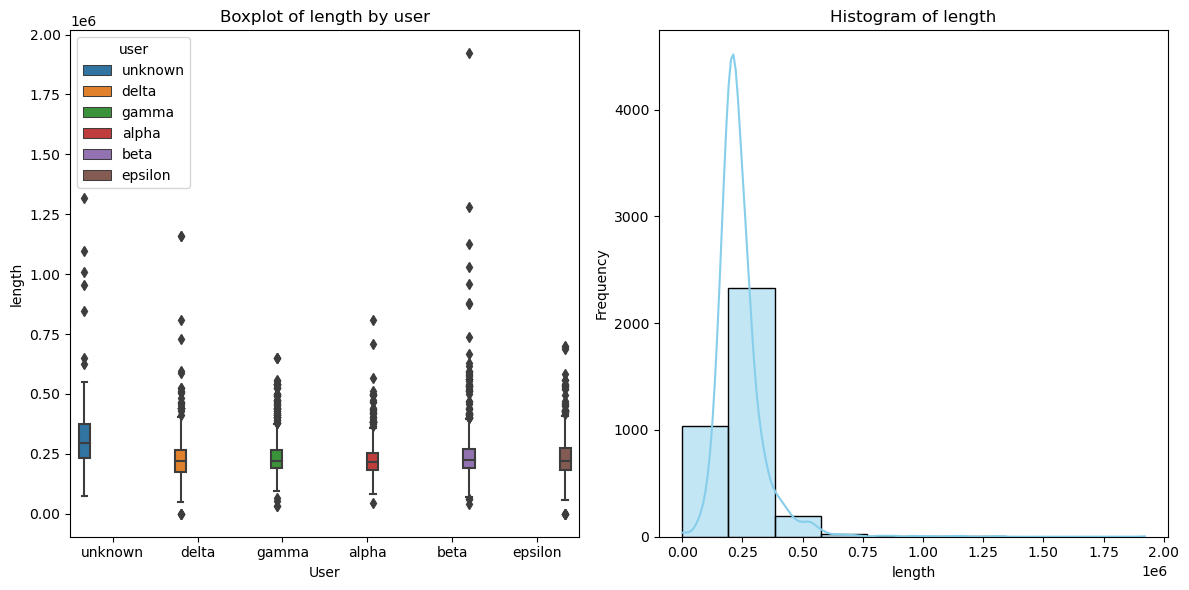

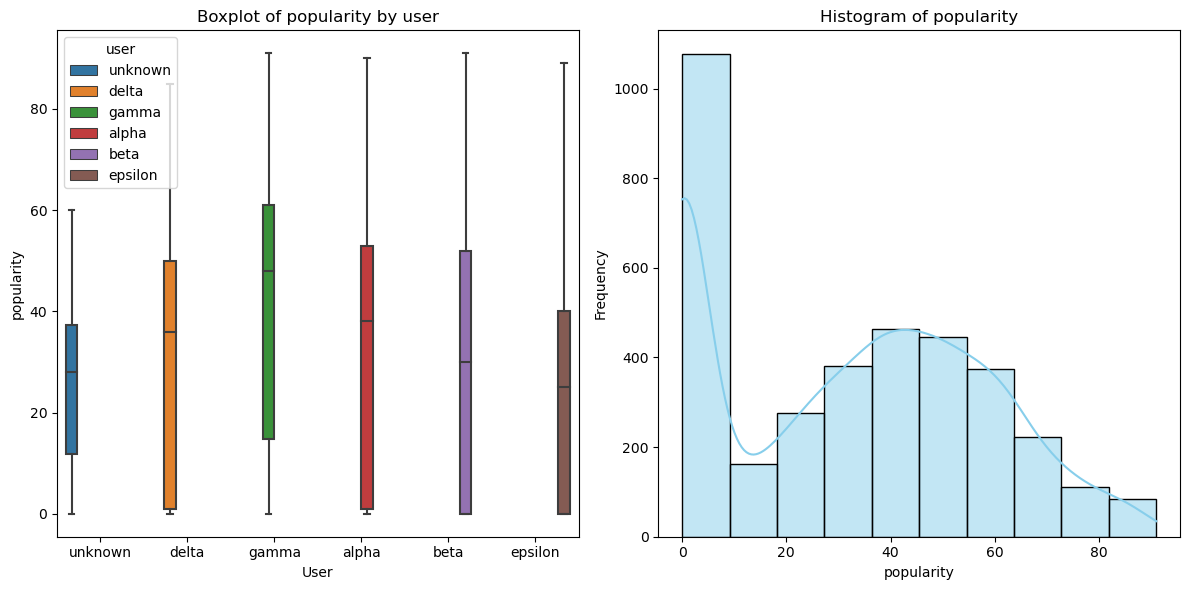

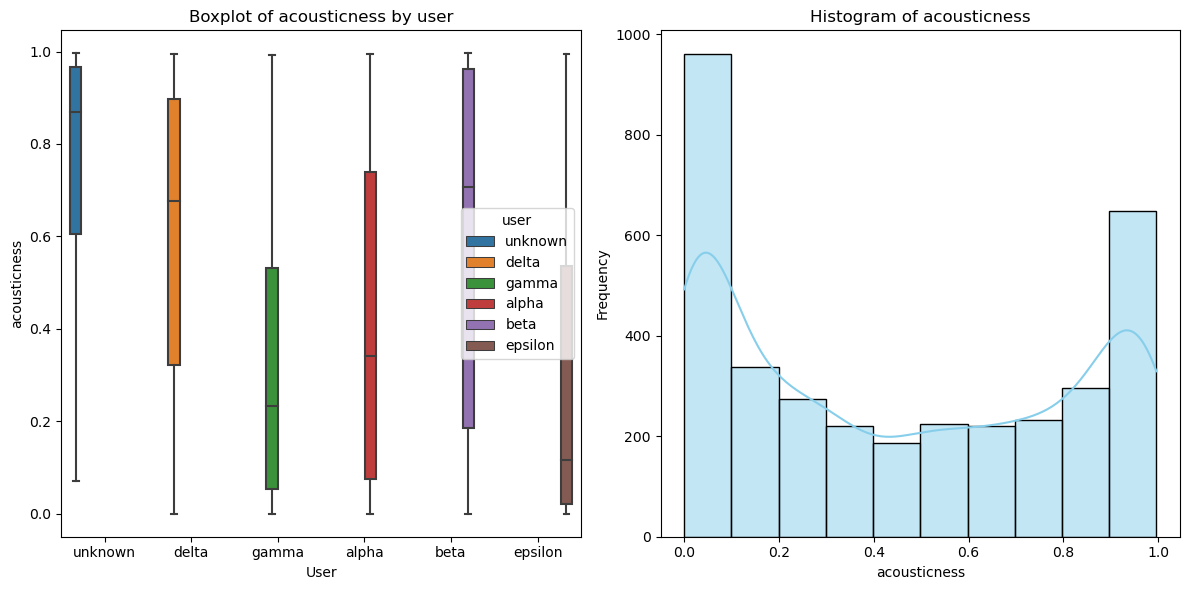

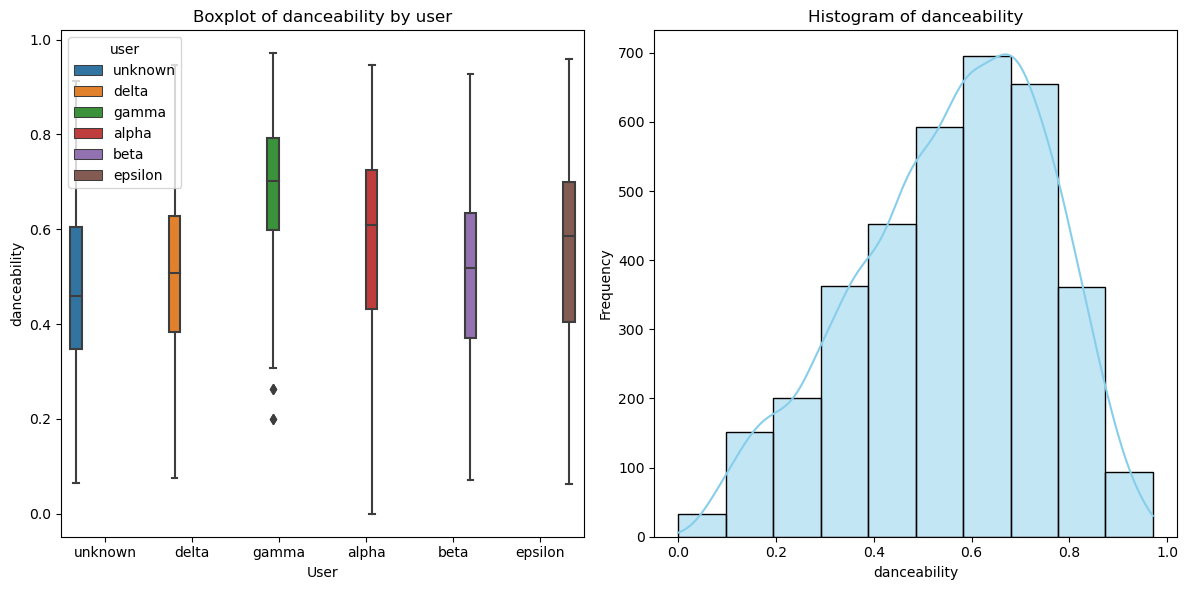

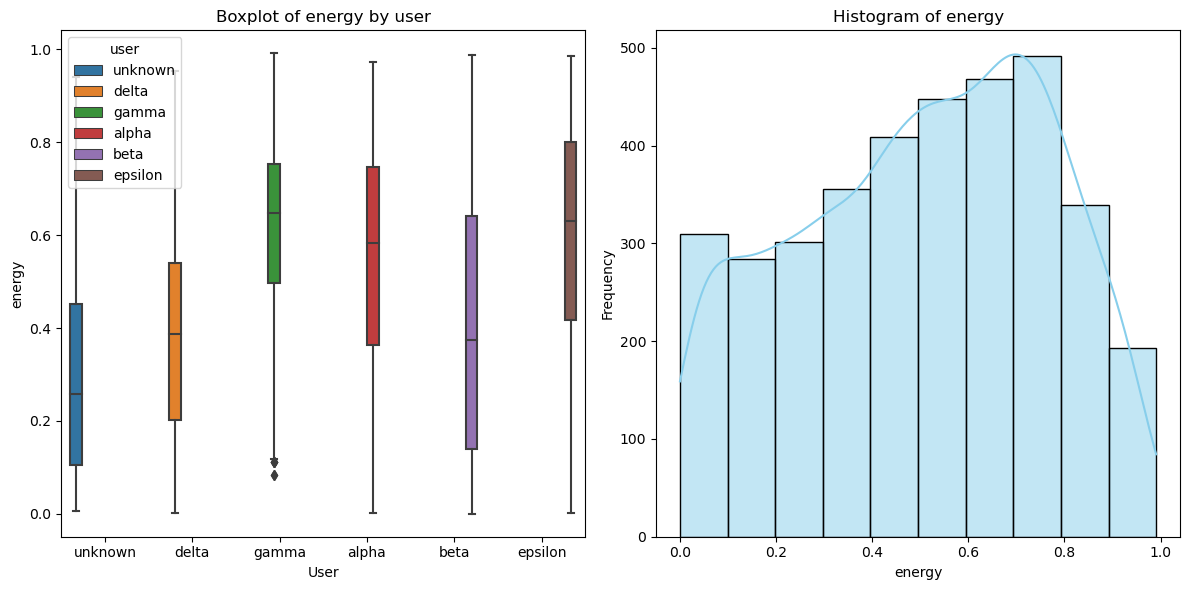

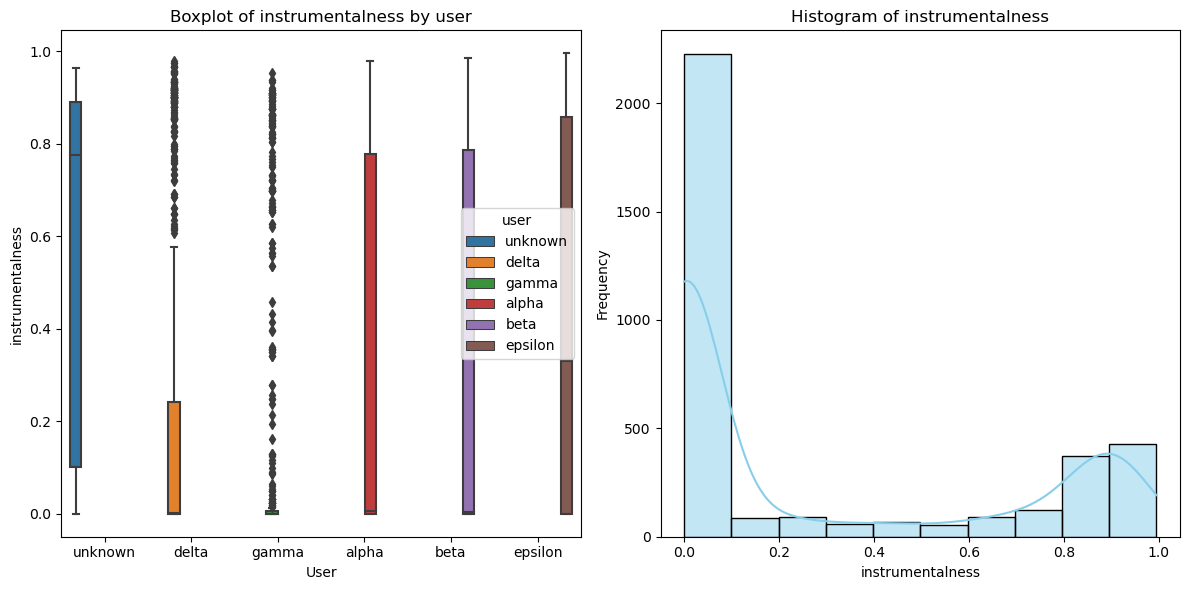

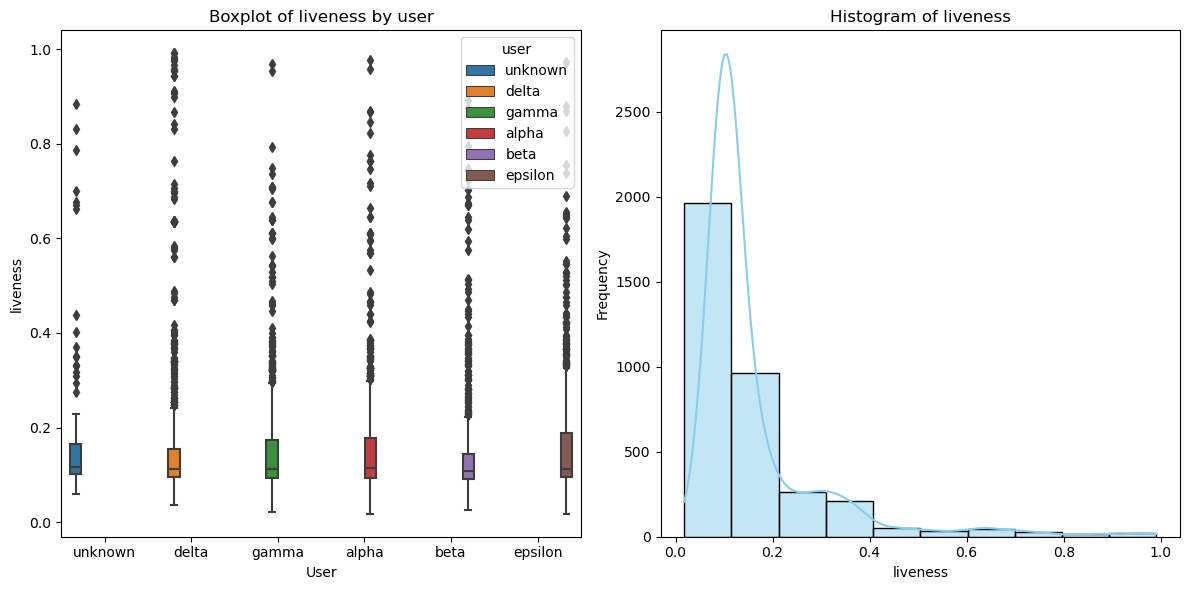

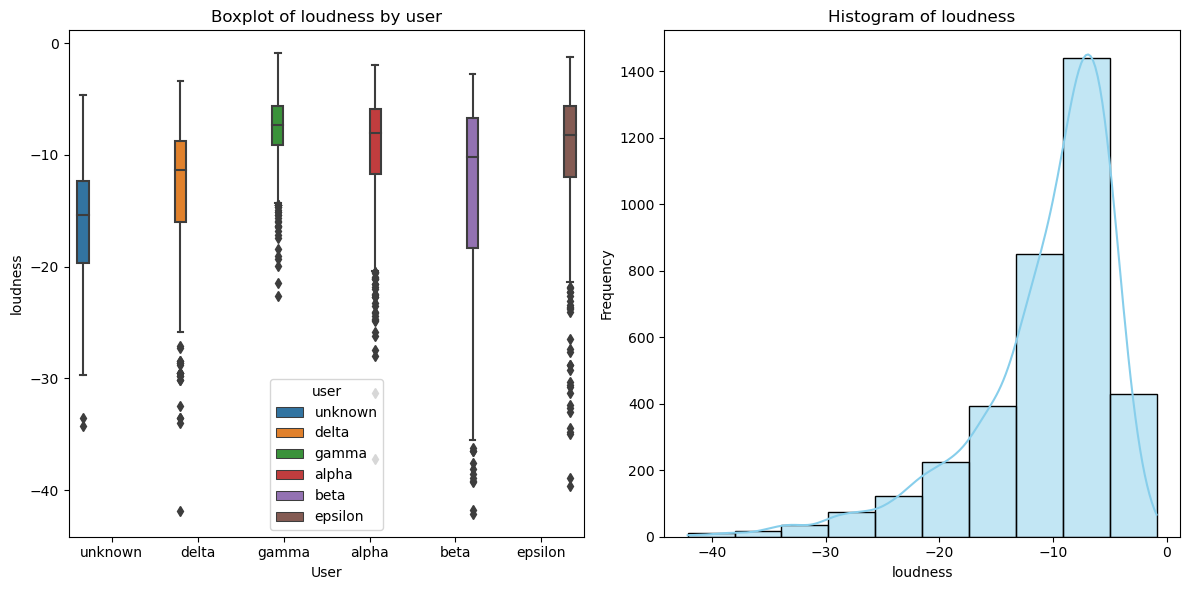

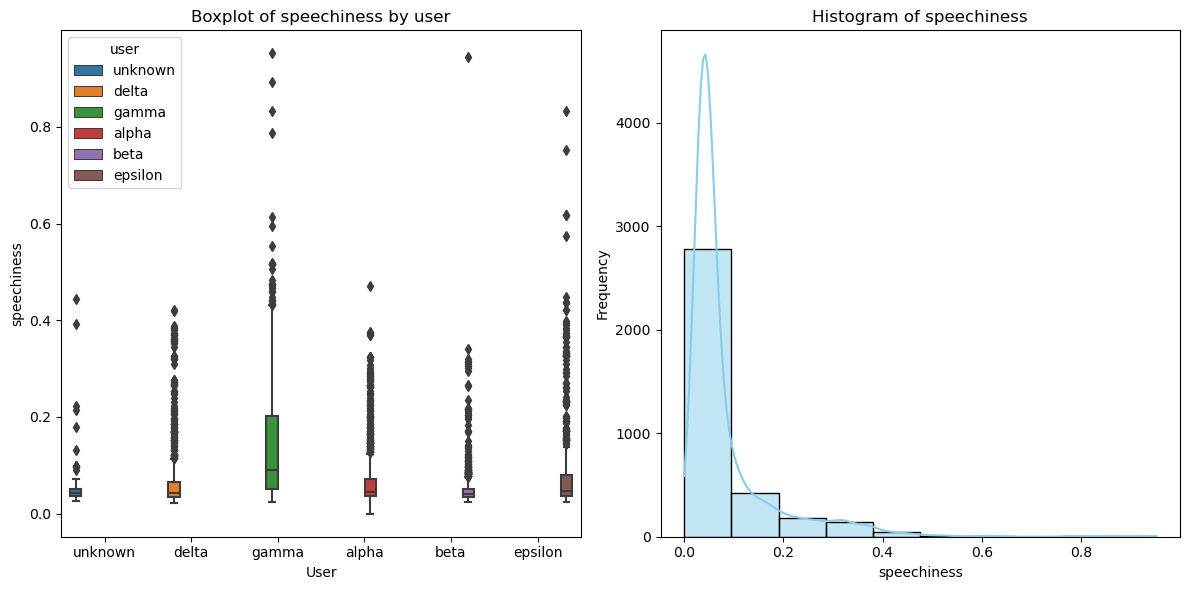

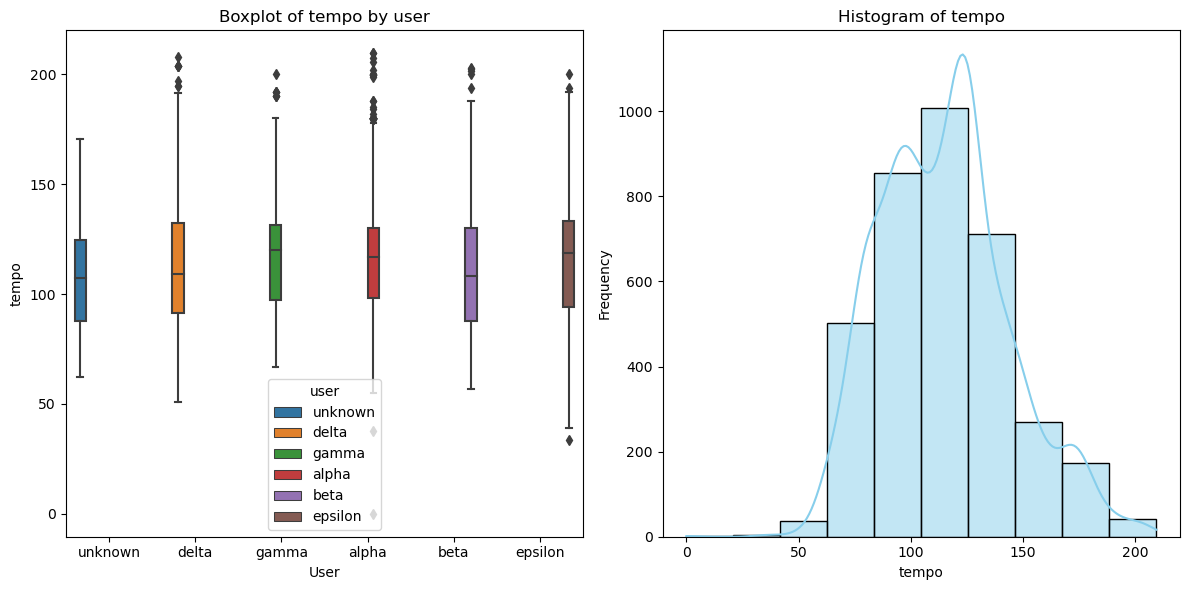

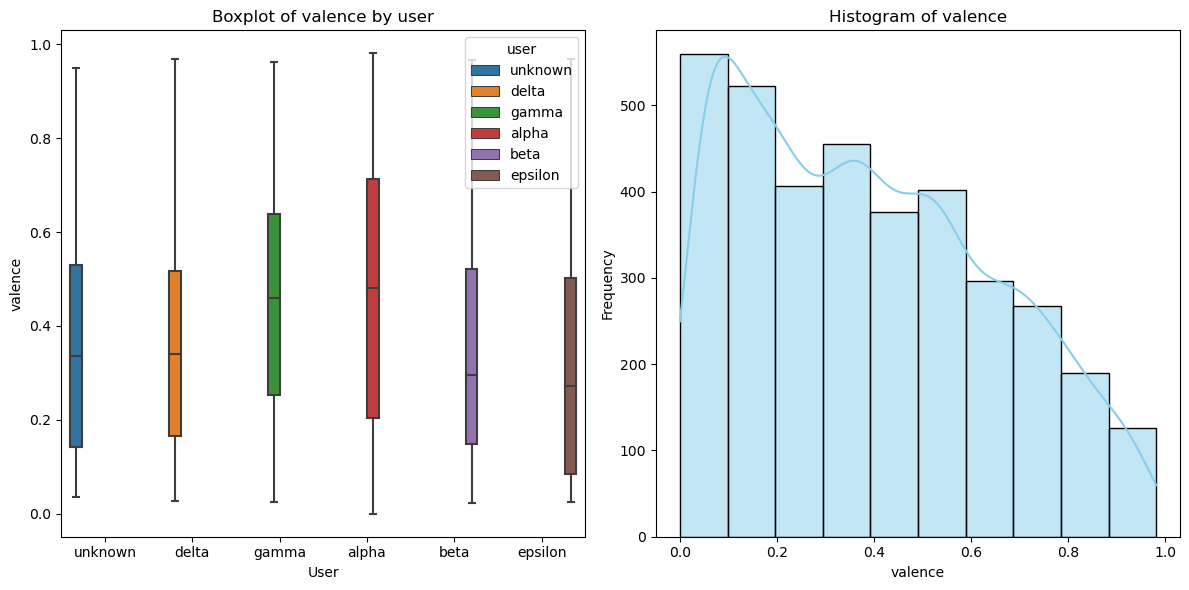

In [19]:
# Plot features against user to see if there is a difference in distribution

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(x='user', y=col, data=df, ax=axes[0], hue='user')
    axes[0].set_title(f'Boxplot of {col} by user' )
    axes[0].set_xlabel('User')
    axes[0].set_ylabel(col)

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[1], bins=10, color='skyblue')
    axes[1].set_title(f'Histogram of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    display(fig)  # Ensures the current figure is displayed in the notebook
    plt.close(fig)  # Closes the figure to avoid overlapping issues

In [20]:
# contingency table between user and categorical variable
print( pd.crosstab(df['user'], df['time_signature'] ) )
print( pd.crosstab(df['user'], df['mode'] ) )

time_signature  0   1    3    4   5
user                               
alpha           1   6   90  597   6
beta            0  14   84  590  12
delta           0   6  133  547  14
epsilon         0   9   47  632  12
gamma           0   3   50  627  20
unknown         0   3   20   72   5
mode       0    1
user             
alpha    390  310
beta     279  421
delta    415  285
epsilon  416  284
gamma    372  328
unknown   57   43


At fist observation it seems that users have differents song that they prefer listen but the difference is not strong.
`gamma` user have the most difference.

`length` and `livness` seems to be feature that does not separate well users

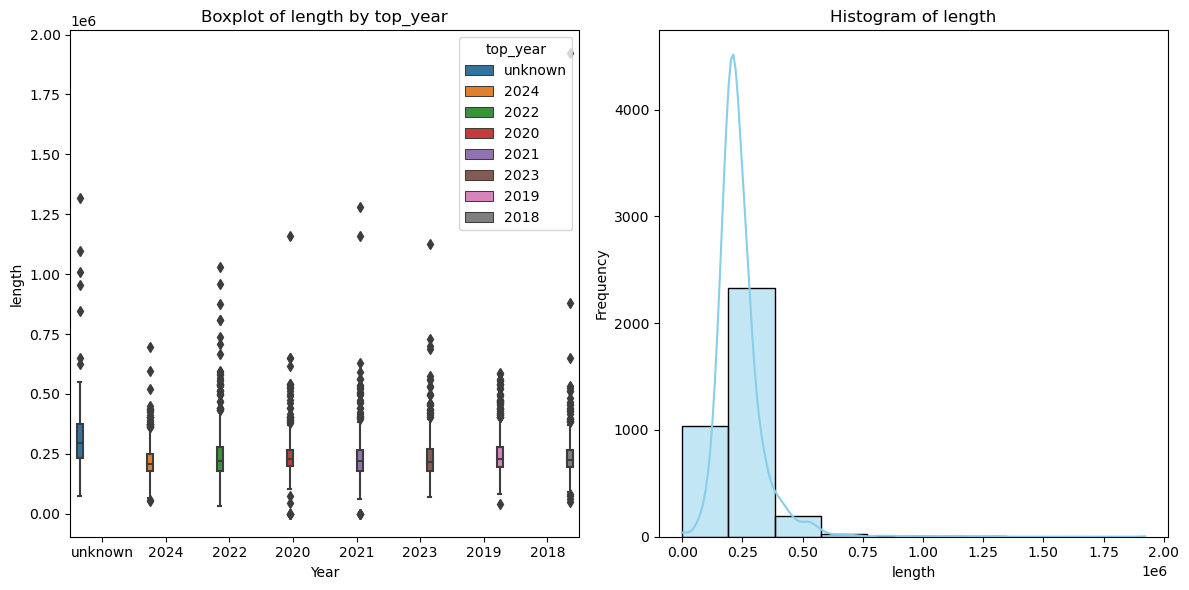

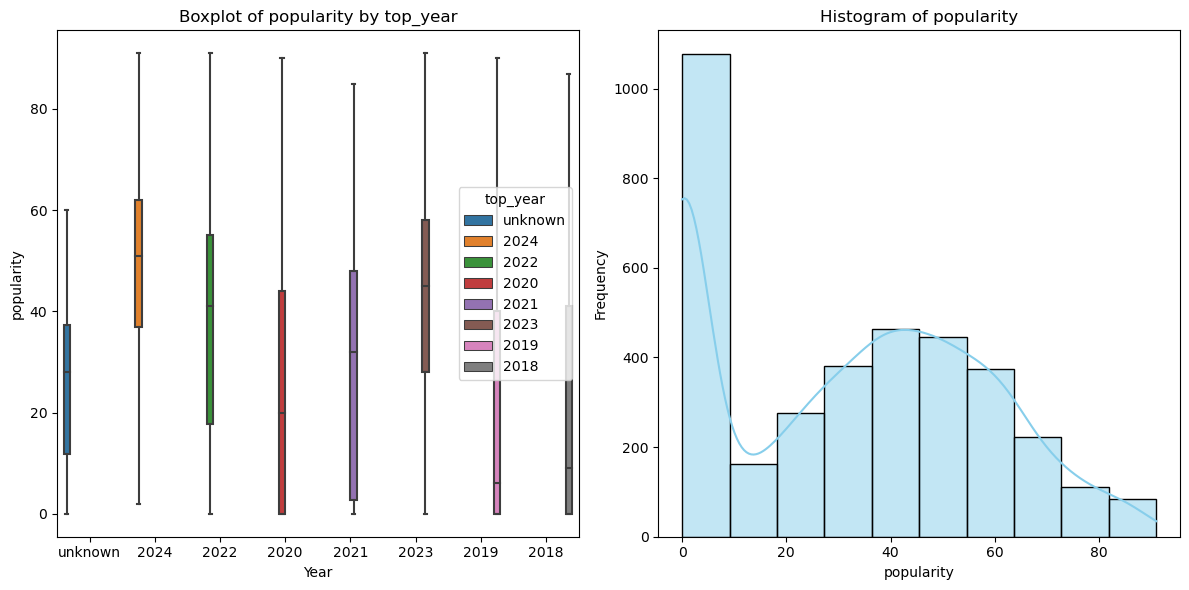

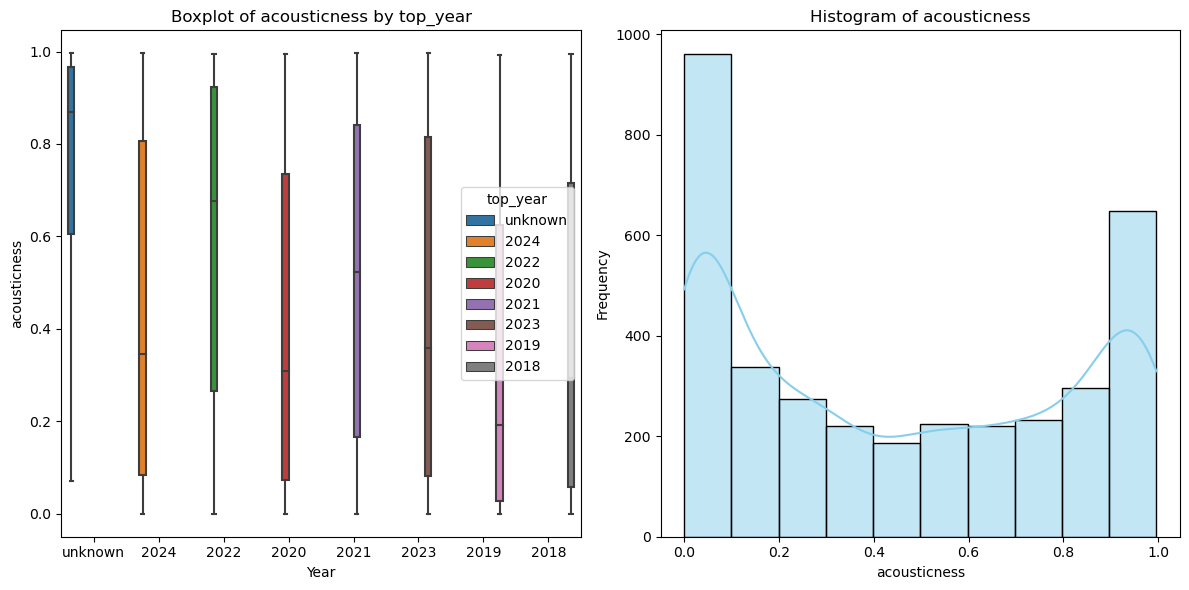

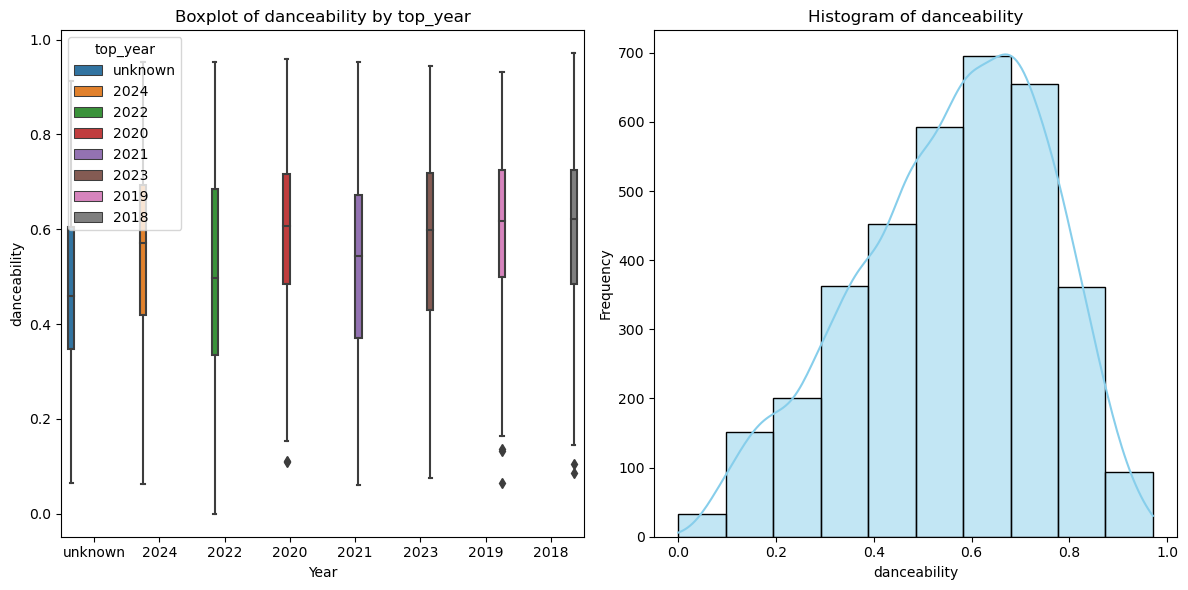

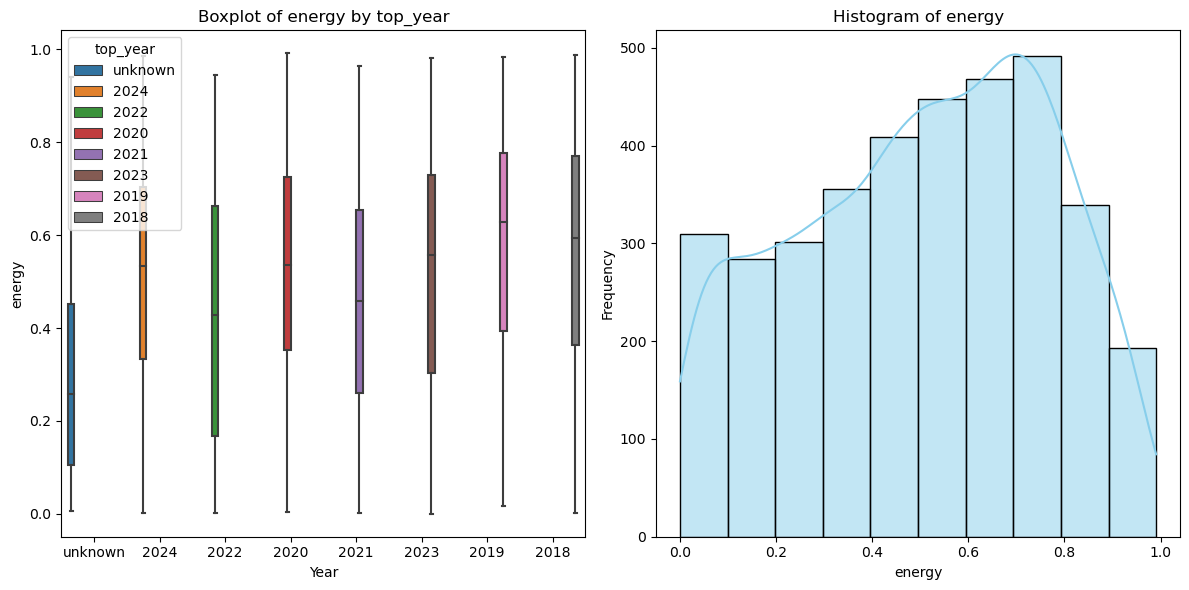

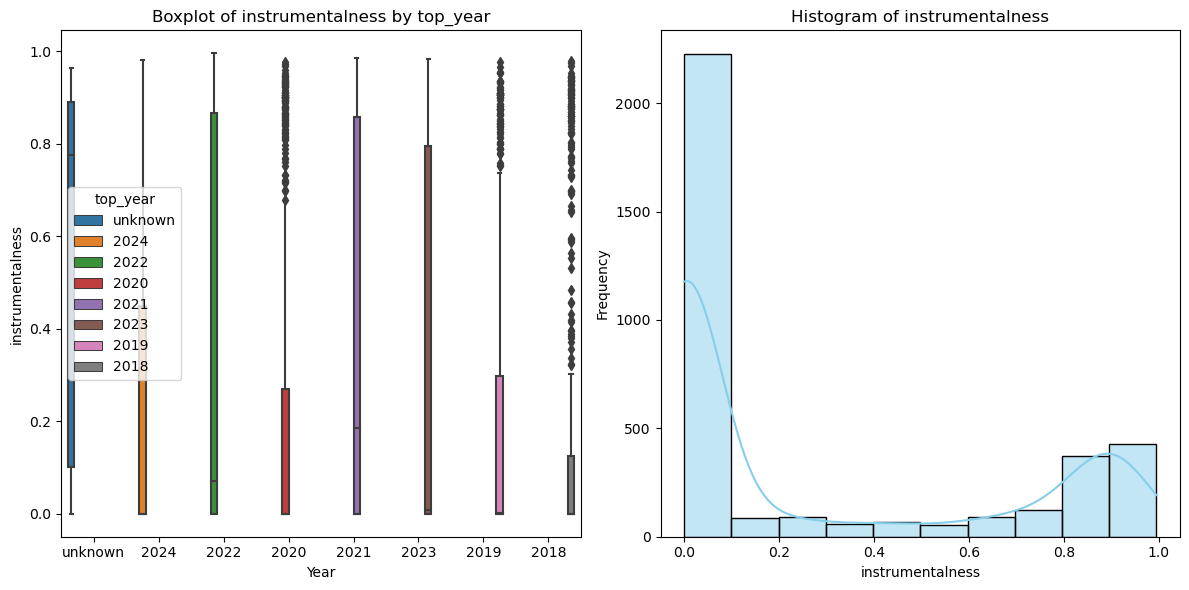

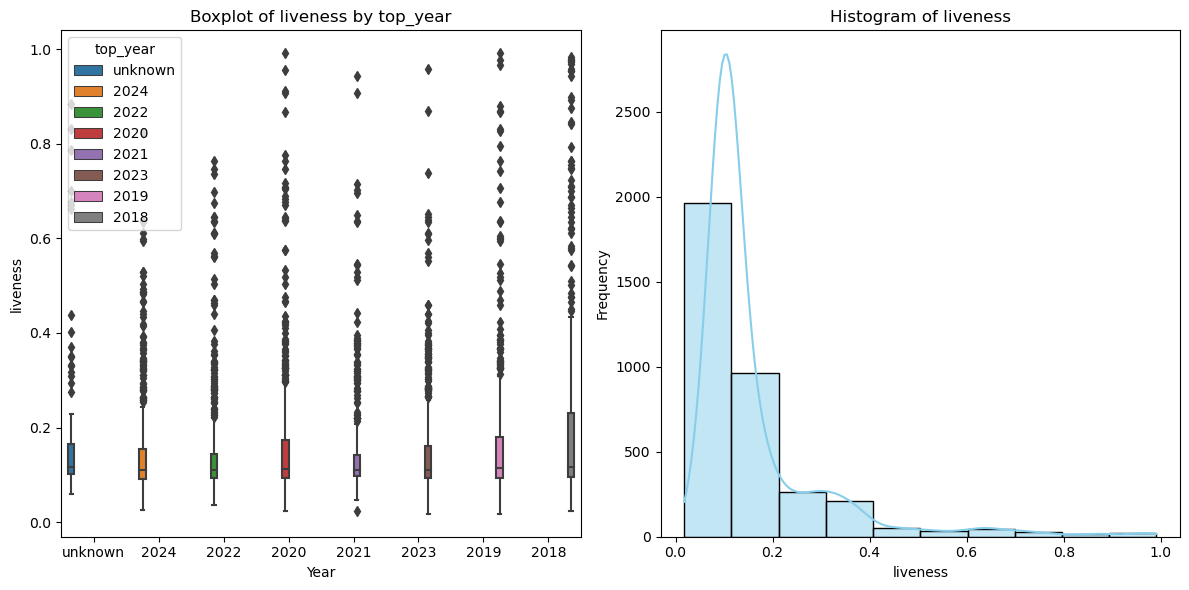

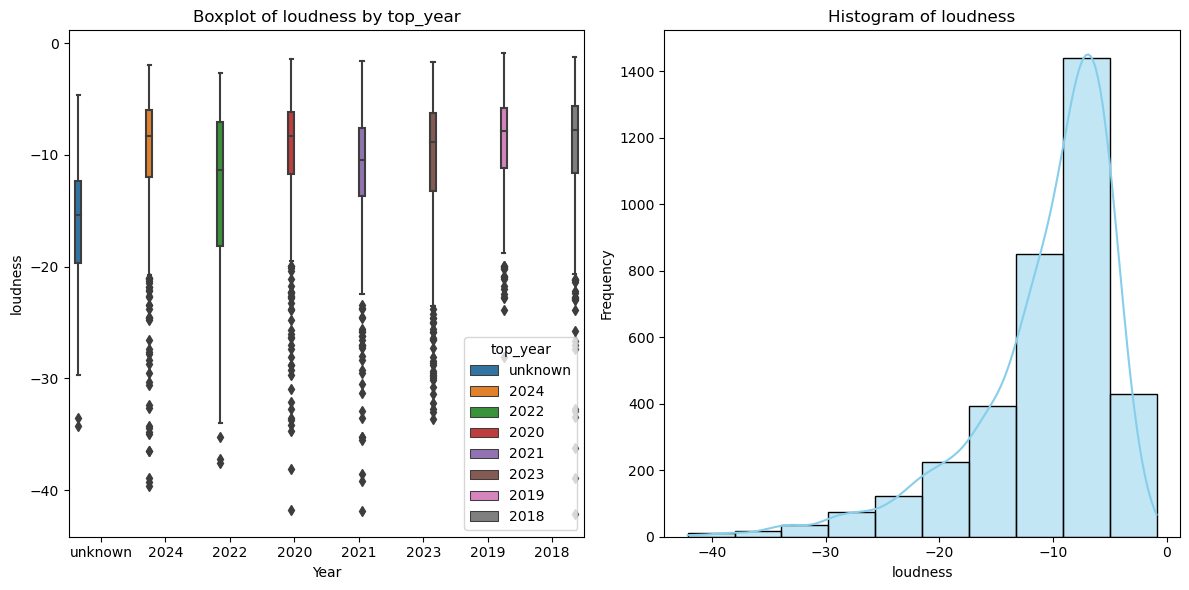

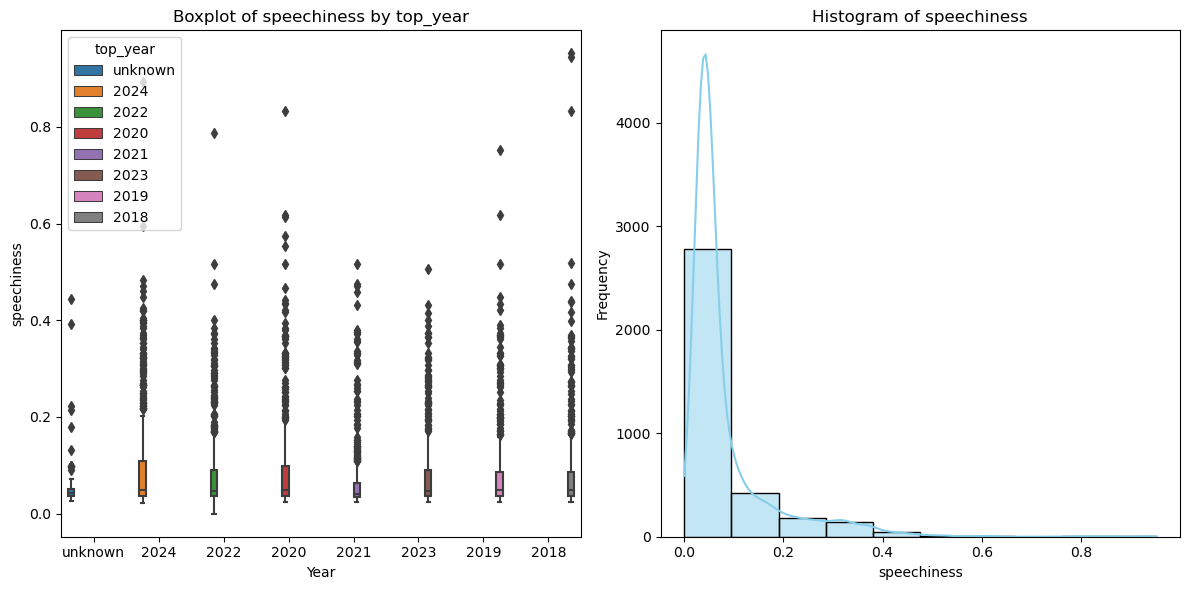

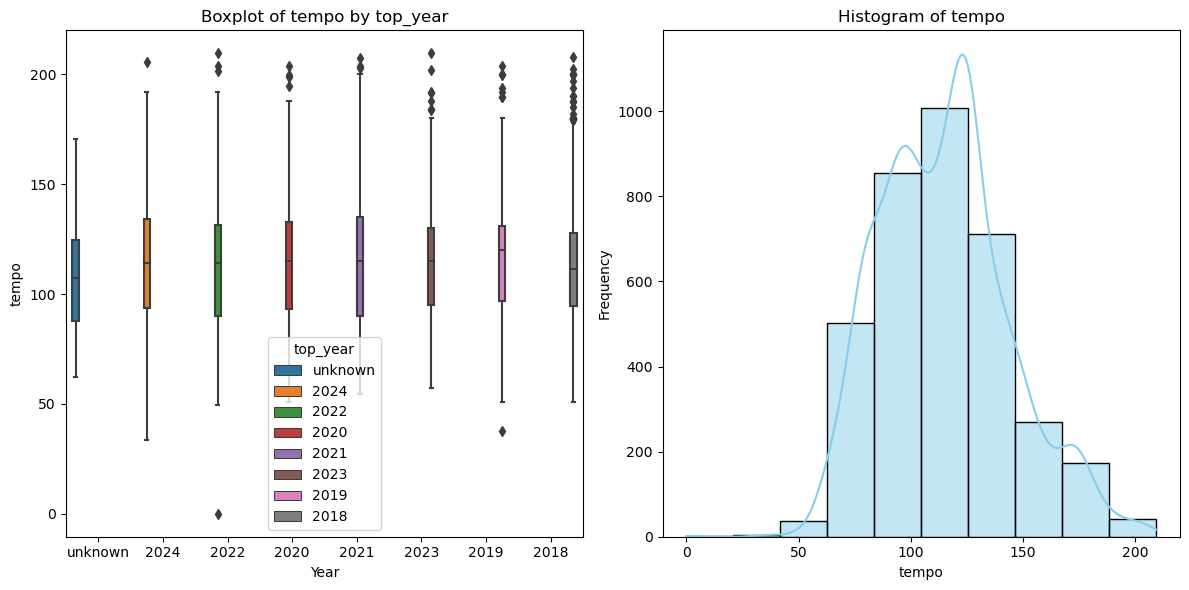

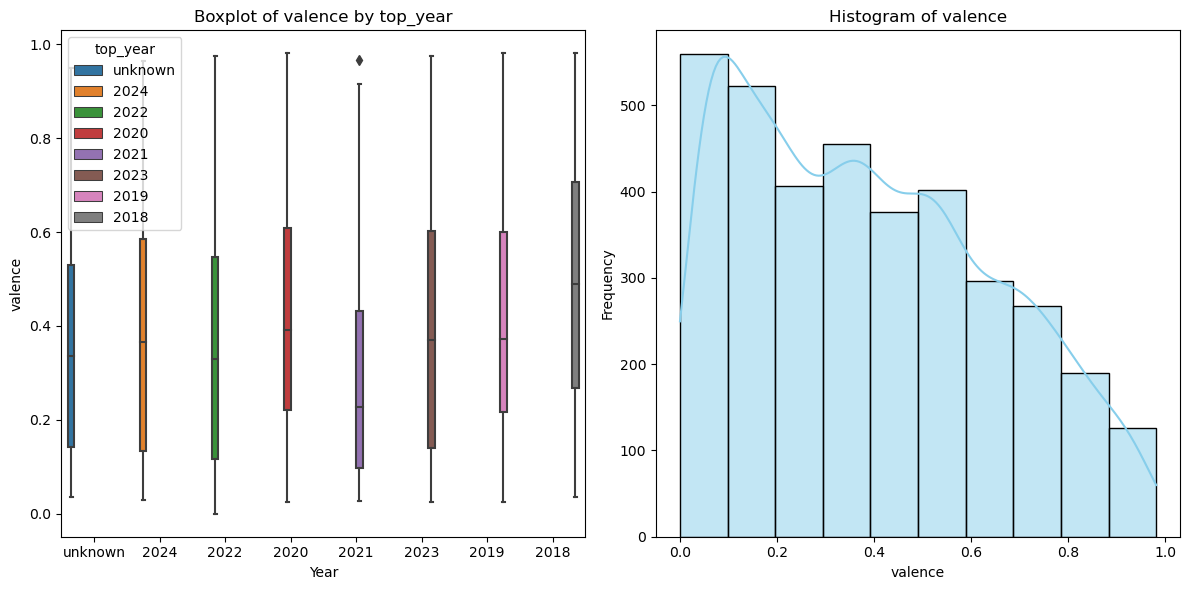

In [21]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(x='top_year', y=col, data=df, ax=axes[0], hue='top_year')
    axes[0].set_title(f'Boxplot of {col} by top_year')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel(col)

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[1], bins=10, color='skyblue')
    axes[1].set_title(f'Histogram of {col}')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

`length`; `danceability`, `liveness` and `speechness` does not separate well top year variable.

In [22]:
# contingency table between user and categorical variable
print( pd.crosstab(df['top_year'], df['time_signature'] ) )
print( pd.crosstab(df['top_year'], df['mode'] ) )

time_signature  0   1   3    4   5
top_year                          
2018            0   4  39  453   4
2019            0   5  42  449   4
2020            0   3  48  438  11
2021            0   7  71  405  17
2022            1  11  91  384  13
2023            0   6  56  432   6
2024            0   2  57  432   9
unknown         0   3  20   72   5
mode        0    1
top_year          
2018      246  254
2019      258  242
2020      253  247
2021      244  256
2022      282  218
2023      303  197
2024      286  214
unknown    57   43


# 2. Preprocessing Data

In [23]:
df = original_df.copy()

In [24]:
# Preprocessing the dataset
def preprocess_data(df):
    # Remove duplicates and rows with no value in 'name'
    df.drop_duplicates(inplace=True)
    df.dropna(subset=['name'], inplace=True)

    # Convert columns to appropriate data types
    df['time_signature'] = df['time_signature'].astype('category')
    df['mode'] = df['mode'].astype('category')
    df['length'] = (df['length'] / 1000).round(0)

    return df

df = preprocess_data(df)

# **3. Build Model for User and Top Year reconstruction**

## 3.1 Model for User Reconstruction (Logistic Regression)

In [25]:
"""
We are creating a feature that counts the number of times a user has listened to each artist.
Past listening behavior of a user is probably a strong indicator of user preference
"""
def feature_engineering_user(df):
    # Step 1: Preserve the original index as a column
    df['original_index'] = df.index

    # Step 2: Create the count matrix for 'user' prediction
    count_matrix = df.groupby(['artist', 'user']).size().unstack(fill_value=0)
    count_matrix = count_matrix.drop(columns=['unknown'], errors='ignore')

    # Step 3: Merge the count matrix back to the original DataFrame
    df = df.merge(count_matrix, on='artist', how='left', suffixes=('', '_artist_count'))

    # Step 4: Restore the original index
    df.set_index('original_index', inplace=True)

    return df

# Apply the feature engineering
df = feature_engineering_user(df)

In [26]:
# Separate known and unknown users
user_known = df[df['user'] != 'unknown']
user_unknown = df[df['user'] == 'unknown']

In [27]:
# Prepare features and labels for user prediction
def clean_features(df):
    columns_to_drop = ['name', 'album', 'artist', 'release_date', 'uri']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    categorical_cols = df.select_dtypes(include=['category', 'object']).columns
    for col in categorical_cols:
        df[col] = pd.Categorical(df[col]).codes
    return df

X_user = clean_features(user_known.drop(columns=['user', 'top_year']))
y_user = user_known['user']
label_encoder_user = LabelEncoder()
y_user_encoded = label_encoder_user.fit_transform(y_user)
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(
    X_user, y_user_encoded, train_size=0.7, random_state=1
)

In [28]:
# Logistic regression pipeline for user prediction
user_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('scaler', StandardScaler()),
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000, penalty='l2')))
])

user_pipeline.fit(X_train_user, y_train_user)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))])

After getting the coefficient, we decide to implement a L2 penalty because the new feature capturing the past artist listened end up being the main predictor of  the user.

However, since there is a lot of artist, issue arise when predicting on past artist listened.

Also, to capture user preference for particular songs (via song characteristic) it is better to ensure penalize the coefficient of the model  ensuring a feature don't become dominant.

In [29]:
# Prediction on User train set
y_train_pred_user = user_pipeline.predict(X_train_user)
print("Training Data Classification Report:")
print(classification_report(y_train_user, y_train_pred_user))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       476
           1       0.85      0.85      0.85       483
           2       0.86      0.86      0.86       478
           3       0.88      0.94      0.91       507
           4       0.91      0.91      0.91       498

    accuracy                           0.87      2442
   macro avg       0.87      0.87      0.87      2442
weighted avg       0.87      0.87      0.87      2442



In [30]:
# Prediction on the test data
y_test_pred_user = user_pipeline.predict(X_test_user)

print("Test Data Classification Report:")
print(classification_report(y_test_user, y_test_pred_user))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       224
           1       0.89      0.85      0.87       217
           2       0.86      0.85      0.85       218
           3       0.81      0.96      0.88       188
           4       0.90      0.88      0.89       200

    accuracy                           0.86      1047
   macro avg       0.86      0.86      0.86      1047
weighted avg       0.86      0.86      0.86      1047



In [59]:
# Get the feature names after PolynomialFeatures transformation
poly_transformer = user_pipeline.named_steps['poly']
feature_names = poly_transformer.get_feature_names_out(X_user.columns)

# Add 'intercept' to the feature names
col_coef_df = ['intercept'] + list(feature_names)

# Access the OneVsRestClassifier inside the pipeline
ovr_classifier = user_pipeline.named_steps['classifier']

# Initialize an empty DataFrame to store coefficients
coef_df = pd.DataFrame(columns=col_coef_df)

# Iterate over each logistic regression model in OneVsRestClassifier
for i, estimator in enumerate(ovr_classifier.estimators_):
    # Combine intercept and coefficients
    intercept_and_coef = [estimator.intercept_[0]] + estimator.coef_.flatten().tolist()
    row = pd.Series(intercept_and_coef, index=col_coef_df)
    
    # Append the row to the DataFrame
    coef_df = pd.concat([coef_df, row.to_frame().T], ignore_index=True)

In [62]:
# Display the coefficients DataFrame
pd.set_option('display.max_columns', None)  # No limit on columns
coef_df

,intercept,1,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,time_signature,key,mode,release_year,alpha,beta,delta,epsilon,gamma
0,-2.331431,0.0,0.020846,0.178645,-0.106109,-0.146477,-0.130187,0.291074,0.039700,0.092756,-0.054931,-0.068596,0.482003,-0.057527,-0.209380,-0.055738,0.010289,3.597974,-0.954675,-1.377378,-1.341443,-2.274764
1,-3.328097,0.0,0.144371,-0.123414,0.299372,-0.204641,-0.029380,-0.681292,-0.131326,-0.514973,-0.515517,0.034145,0.189384,0.124223,0.135267,0.425984,0.081932,-0.670419,2.000570,-3.961518,-0.683088,-0.826390
2,-2.054732,0.0,-0.136710,-0.052910,0.161560,-0.087244,-0.623083,-0.360372,0.077926,0.127911,-0.208334,0.065026,0.012869,0.025032,-0.006837,-0.143243,-0.323963,-1.746668,-1.368798,5.155426,-0.851132,-1.492526
3,-4.118176,0.0,-0.167088,-0.235065,-0.298462,-0.161761,0.334108,0.358411,0.075180,0.195855,0.176890,-0.009346,-0.204863,0.107326,0.119773,-0.153265,0.404605,-4.133221,-3.417162,-3.264291,7.841610,-2.551439
4,-2.081766,0.0,0.226947,0.215002,-0.088390,0.551786,-0.049510,-0.048487,-0.110286,0.531686,0.114993,0.079155,-0.190582,-0.105817,-0.085230,0.103768,0.029317,-1.576696,-1.735415,-0.034366,-0.496279,4.921511


By extracting the coefficient for each logistic regression, we can see that the new feature created (count of artist) still contribute to the prediction of the user but thanks to L2 penalty, the model can incorporate some sound characteristic in its prediction. (before L2, the coefficient was over 50 compare to the 2 of 3 of other features)

The model performance is very good because we based our prediction on past listening artists.

For recovering data, the model performance is very good however it should be noted that in case of generalization, the model with perform badly if it encounter a song that was never liten by any user (cold start issue)

## 3.2 Model for Top Year Reconstruction (KNN)

In [31]:
"""
We are creating a feature that counts the number of times for a given year that an album was a top song.
Since album have multiple songs, it should improve the model accuracy since popularity of a song is linked with album popularity
"""

def feature_engineering_year(df):
    # Step 1: Preserve the original index as a column
    df['original_index'] = df.index

    # Step 2: Create the count matrix for 'top_year' prediction
    count_matrix = df.groupby(['album', 'top_year']).size().unstack(fill_value=0)
    count_matrix = count_matrix.drop(columns=['unknown'], errors='ignore')

    # Step 3: Merge the count matrix back to the original DataFrame
    df = df.merge(count_matrix, on='album', how='left', suffixes=('', '_album_count'))

    # Step 4: Restore the original index
    df.set_index('original_index', inplace=True)

    return df

In [32]:
df = feature_engineering_year(df)
# Separate known and unknown top_year
year_known = df[df['top_year'] != 'unknown']
year_unknown = df[df['top_year'] == 'unknown']

In [33]:
# Prepare features and labels for top_year prediction
X_year = clean_features(year_known.drop(columns=['user', 'top_year']))
y_year = year_known['top_year']
label_encoder_year = LabelEncoder()
y_year_encoded = label_encoder_year.fit_transform(y_year)
X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(
    X_year, y_year_encoded, test_size=0.3, random_state=1
)

In [34]:
"""
We try KNN clustering with k = 7 due to knowledge that there is 7 differents to predict (7 classes)
We do hyperparameter optimization to search for the most accurate model
"""

# KNN pipeline for top_year prediction
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': [7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
grid_search_year = GridSearchCV(knn_pipeline, param_grid, cv=10, scoring='accuracy')
grid_search_year.fit(X_train_year, y_train_year)

# Best parameter founded, k = 7 match the knowledge of our data (7 class to predict from 2018 to 2024)
# df['top_year'].unique() => ['2024', '2022', '2020', '2021', '2023', '2019', '2018']
print("Best Parameters:", grid_search_year.best_params_)

Best Parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}


In [35]:
# Prediction on Top Year train set
y_train_pred_year = grid_search_year.predict(X_train_year)

print("Training Data Classification Report:")
print(classification_report(y_train_year, y_train_pred_year))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       337
           1       0.79      0.80      0.79       348
           2       0.79      0.78      0.78       347
           3       0.74      0.81      0.77       343
           4       0.74      0.70      0.72       370
           5       0.73      0.69      0.71       348
           6       0.82      0.75      0.78       349

    accuracy                           0.77      2442
   macro avg       0.77      0.77      0.77      2442
weighted avg       0.77      0.77      0.77      2442



In [36]:
# Prediction on Top Year test data
y_test_pred_year = grid_search_year.predict(X_test_year)

print("Test Data Classification Report:")
print(classification_report(y_test_year, y_test_pred_year))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       163
           1       0.73      0.74      0.73       150
           2       0.66      0.71      0.68       148
           3       0.65      0.69      0.67       153
           4       0.49      0.54      0.51       130
           5       0.58      0.47      0.52       152
           6       0.74      0.63      0.68       151

    accuracy                           0.66      1047
   macro avg       0.65      0.65      0.65      1047
weighted avg       0.66      0.66      0.66      1047



Model seems to overfit a little on the training data set and is underfitting on the real test set.
We will try another model.

# 3.3 Model for DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.tree import plot_tree

In [38]:
"""
Use Decisiton Tree to predict top year with random hyperparameter search
"""


# Define the hyper-parameters to search
param_distributions = dict(
    criterion = ['gini', 'entropy'],
    max_depth = randint(low = 10, high = 50),
    min_samples_split = randint(low = 2, high = 30),
    min_samples_leaf = randint(low = 1, high = 30),
    max_features = ['sqrt', 'log2', None],
    min_impurity_decrease = uniform(0, 0.01)
)

# Hyper-parameter tuning through random search cross-validation
rand_clf = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = param_distributions,
    n_iter = 20,  # Number of parameter settings that are sampled
    scoring = 'accuracy',  # Use F1 weighted score for evaluation
    refit = True,  # Refitting the best model after searching
    cv = 10,  # 3-fold cross-validation
    verbose = 10,  # Verbosity level
    random_state = 0,  # For reproducibility
)

rand_clf.fit(X_train_year, y_train_year)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 1/10; 1/20] END criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6;, score=0.208 total time=   0.0s
[CV 2/10; 1/20] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 2/10; 1/20] END criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6;, score=0.380 total time=   0.0s
[CV 3/10; 1/20] START criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.006235636967859724, min_samples_leaf=19, min_samples_split=6
[CV 3/10; 1/20] END criterion=gini, max_depth=10, max_features=log2, min_impurity_decrease=0.00

[CV 2/10; 5/20] END criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232764, min_samples_leaf=25, min_samples_split=19;, score=0.486 total time=   0.0s
[CV 3/10; 5/20] START criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232764, min_samples_leaf=25, min_samples_split=19
[CV 3/10; 5/20] END criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232764, min_samples_leaf=25, min_samples_split=19;, score=0.779 total time=   0.0s
[CV 4/10; 5/20] START criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232764, min_samples_leaf=25, min_samples_split=19
[CV 4/10; 5/20] END criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232764, min_samples_leaf=25, min_samples_split=19;, score=0.648 total time=   0.0s
[CV 5/10; 5/20] START criterion=entropy, max_depth=25, max_features=sqrt, min_impurity_decrease=0.00978618342232

[CV 8/10; 7/20] END criterion=entropy, max_depth=42, max_features=None, min_impurity_decrease=0.004146619399905236, min_samples_leaf=4, min_samples_split=13;, score=0.758 total time=   0.0s
[CV 9/10; 7/20] START criterion=entropy, max_depth=42, max_features=None, min_impurity_decrease=0.004146619399905236, min_samples_leaf=4, min_samples_split=13
[CV 9/10; 7/20] END criterion=entropy, max_depth=42, max_features=None, min_impurity_decrease=0.004146619399905236, min_samples_leaf=4, min_samples_split=13;, score=0.766 total time=   0.0s
[CV 10/10; 7/20] START criterion=entropy, max_depth=42, max_features=None, min_impurity_decrease=0.004146619399905236, min_samples_leaf=4, min_samples_split=13
[CV 10/10; 7/20] END criterion=entropy, max_depth=42, max_features=None, min_impurity_decrease=0.004146619399905236, min_samples_leaf=4, min_samples_split=13;, score=0.762 total time=   0.0s
[CV 1/10; 8/20] START criterion=gini, max_depth=38, max_features=None, min_impurity_decrease=0.001352181734054

[CV 7/10; 10/20] END criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.009023485831739843, min_samples_leaf=8, min_samples_split=11;, score=0.758 total time=   0.0s
[CV 8/10; 10/20] START criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.009023485831739843, min_samples_leaf=8, min_samples_split=11
[CV 8/10; 10/20] END criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.009023485831739843, min_samples_leaf=8, min_samples_split=11;, score=0.689 total time=   0.0s
[CV 9/10; 10/20] START criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.009023485831739843, min_samples_leaf=8, min_samples_split=11
[CV 9/10; 10/20] END criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.009023485831739843, min_samples_leaf=8, min_samples_split=11;, score=0.730 total time=   0.0s
[CV 10/10; 10/20] START criterion=entropy, max_depth=41, max_features=sqrt, min_impurity_decrease=0.0090234

[CV 10/10; 13/20] END criterion=gini, max_depth=30, max_features=sqrt, min_impurity_decrease=0.009589492686245203, min_samples_leaf=16, min_samples_split=22;, score=0.287 total time=   0.0s
[CV 1/10; 14/20] START criterion=entropy, max_depth=22, max_features=sqrt, min_impurity_decrease=0.005818503294385343, min_samples_leaf=15, min_samples_split=17
[CV 1/10; 14/20] END criterion=entropy, max_depth=22, max_features=sqrt, min_impurity_decrease=0.005818503294385343, min_samples_leaf=15, min_samples_split=17;, score=0.645 total time=   0.0s
[CV 2/10; 14/20] START criterion=entropy, max_depth=22, max_features=sqrt, min_impurity_decrease=0.005818503294385343, min_samples_leaf=15, min_samples_split=17
[CV 2/10; 14/20] END criterion=entropy, max_depth=22, max_features=sqrt, min_impurity_decrease=0.005818503294385343, min_samples_leaf=15, min_samples_split=17;, score=0.739 total time=   0.0s
[CV 3/10; 14/20] START criterion=entropy, max_depth=22, max_features=sqrt, min_impurity_decrease=0.00581

[CV 2/10; 17/20] END criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.009719450024996659, min_samples_leaf=4, min_samples_split=4;, score=0.784 total time=   0.0s
[CV 3/10; 17/20] START criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.009719450024996659, min_samples_leaf=4, min_samples_split=4
[CV 3/10; 17/20] END criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.009719450024996659, min_samples_leaf=4, min_samples_split=4;, score=0.779 total time=   0.0s
[CV 4/10; 17/20] START criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.009719450024996659, min_samples_leaf=4, min_samples_split=4
[CV 4/10; 17/20] END criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.009719450024996659, min_samples_leaf=4, min_samples_split=4;, score=0.770 total time=   0.0s
[CV 5/10; 17/20] START criterion=entropy, max_depth=46, max_features=None, min_impurity_decrease=0.0097194500249

[CV 7/10; 19/20] END criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_samples_leaf=4, min_samples_split=29;, score=0.762 total time=   0.0s
[CV 8/10; 19/20] START criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_samples_leaf=4, min_samples_split=29
[CV 8/10; 19/20] END criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_samples_leaf=4, min_samples_split=29;, score=0.795 total time=   0.0s
[CV 9/10; 19/20] START criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_samples_leaf=4, min_samples_split=29
[CV 9/10; 19/20] END criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_samples_leaf=4, min_samples_split=29;, score=0.762 total time=   0.0s
[CV 10/10; 19/20] START criterion=gini, max_depth=33, max_features=None, min_impurity_decrease=0.006886611828057704, min_s

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B757D0DD0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023B78624AD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B75337110>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000023B754133D0>},
                   random_state=0, scoring='accuracy', verbose=10)

In [39]:
# Output the best parameters and score
print("Best Parameters:", rand_clf.best_params_)
print("Best Score:", rand_clf.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 46, 'max_features': None, 'min_impurity_decrease': 0.009719450024996659, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best Score: 0.7780595516895283


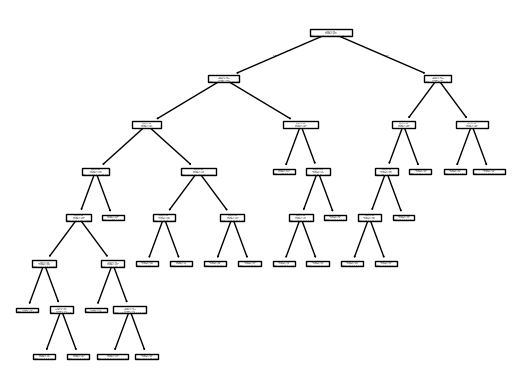

In [40]:
# obtain the best estimator
plt.figure()
plot_tree(rand_clf.best_estimator_)
plt.show()

In [41]:
# Prediction on Top Year train set
y_train_pred_year = rand_clf.predict(X_train_year)

print("Training Data Classification Report:")
print(classification_report(y_train_year, y_train_pred_year))

Training Data Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       337
           1       0.68      0.94      0.79       348
           2       0.80      0.73      0.77       347
           3       0.87      0.80      0.84       343
           4       0.73      0.81      0.77       370
           5       0.75      0.72      0.73       348
           6       0.99      0.72      0.83       349

    accuracy                           0.79      2442
   macro avg       0.81      0.79      0.79      2442
weighted avg       0.81      0.79      0.79      2442



In [42]:
# Prediction on Top Year test data
y_test_pred_year = rand_clf.predict(X_test_year)

print("Test Data Classification Report:")
print(classification_report(y_test_year, y_test_pred_year))

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       163
           1       0.64      0.91      0.75       150
           2       0.78      0.76      0.77       148
           3       0.87      0.79      0.83       153
           4       0.63      0.78      0.70       130
           5       0.71      0.62      0.66       152
           6       0.97      0.69      0.81       151

    accuracy                           0.76      1047
   macro avg       0.78      0.76      0.76      1047
weighted avg       0.78      0.76      0.76      1047



Got better result on classifier tree

## 4. Reconstruction Dataset (Top Year and User)

In [43]:
# Predict unknown users
X_unknown_user = clean_features(user_unknown.drop(columns=['user', 'top_year']))
user_unknown['user'] = label_encoder_user.inverse_transform(user_pipeline.predict(X_unknown_user))

# Predict unknown top_year
X_unknown_year = clean_features(year_unknown.drop(columns=['user', 'top_year']))
year_unknown['top_year'] = label_encoder_year.inverse_transform(rand_clf.predict(X_unknown_year))

C:\Users\Robert\AppData\Local\Temp\ipykernel_8408\4223844025.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_unknown['top_year'] = label_encoder_year.inverse_transform(rand_clf.predict(X_unknown_year))


In [44]:
original_columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity',
                    'acousticness', 'danceability', 'energy', 'instrumentalness',
                    'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                    'time_signature', 'key', 'mode', 'uri', 'release_year',
                    'top_year', 'user']

df = df[original_columns]

In [45]:
year_series = pd.Series(year_unknown['top_year'].values, index=year_unknown.index)
user_series = pd.Series(user_unknown['user'].values, index=user_unknown.index)

In [46]:
df.loc[df.index.isin(year_unknown.index), 'top_year'] = year_unknown
df.loc[df.index.isin(user_unknown.index), 'user'] = user_series

In [47]:
#Re append the drop NA value
df = pd.concat([df, original_df[original_df['name'].isna()]], ignore_index=True)

In [ ]:
##################################  CAREFUL RUNNING THIS  ##################################

In [49]:
# Iterate through each unique user and release year combination
for user in df['user'].unique():
    for year in df['top_year'].unique():
        # Filter the data based on user and year
        subset_df = df[(df['user'] == user) & (df['top_year'] == year)]

        if not subset_df.empty:
            # Create the filename based on the user and year
            filename = f"{user}_{year}.csv"

            # Write the filtered data to a CSV file
            subset_df.to_csv(filename, index=False)
            print(f"Data saved to {filename}")         

Data saved to beta_2024.csv
Data saved to beta_2022.csv
Data saved to beta_2020.csv
Data saved to beta_2021.csv
Data saved to beta_2023.csv
Data saved to beta_2019.csv
Data saved to beta_2018.csv
Data saved to delta_2024.csv
Data saved to delta_2022.csv
Data saved to delta_2020.csv
Data saved to delta_2021.csv
Data saved to delta_2023.csv
Data saved to delta_2019.csv
Data saved to delta_2018.csv
Data saved to gamma_2024.csv
Data saved to gamma_2022.csv
Data saved to gamma_2020.csv
Data saved to gamma_2021.csv
Data saved to gamma_2023.csv
Data saved to gamma_2019.csv
Data saved to gamma_2018.csv
Data saved to alpha_2024.csv
Data saved to alpha_2022.csv
Data saved to alpha_2020.csv
Data saved to alpha_2021.csv
Data saved to alpha_2023.csv
Data saved to alpha_2019.csv
Data saved to alpha_2018.csv
Data saved to epsilon_2024.csv
Data saved to epsilon_2022.csv
Data saved to epsilon_2020.csv
Data saved to epsilon_2021.csv
Data saved to epsilon_2023.csv
Data saved to epsilon_2019.csv
Data save

In [72]:
# Checking number of file we are supposed to have
df[['top_year', 'user', 'artist']].groupby(['top_year', 'user']).count().shape

(35, 1)

###  END